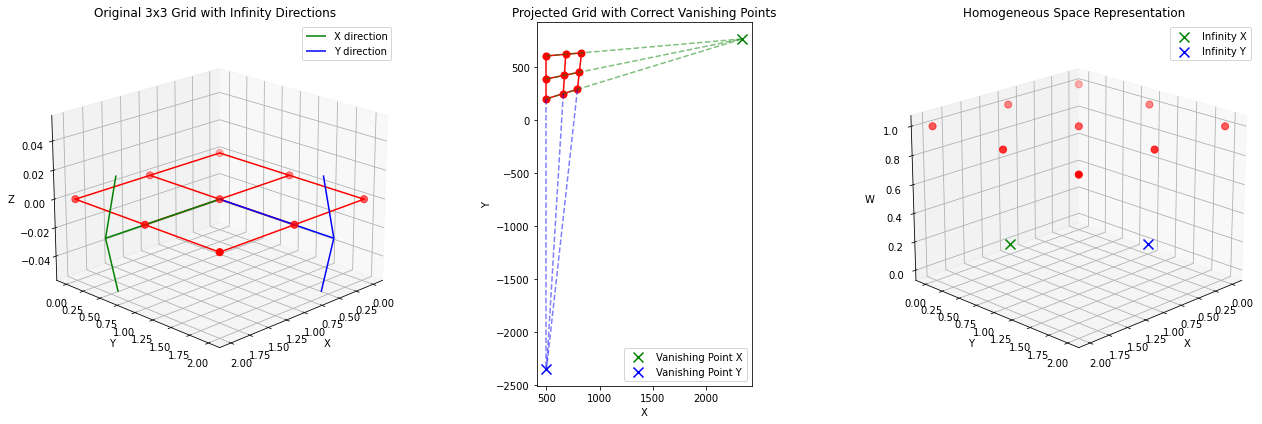

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3x3 grid
grid = np.array([
    [0, 0, 0], [1, 0, 0], [2, 0, 0],
    [0, 1, 0], [1, 1, 0], [2, 1, 0],
    [0, 2, 0], [1, 2, 0], [2, 2, 0]
])

# Convert to homogeneous coordinates
grid_homogeneous = np.hstack((grid, np.ones((9, 1))))

# Define points at infinity for x and y directions
inf_x = np.array([1, 0, 0, 0])
inf_y = np.array([0, 1, 0, 0])

# Camera parameters
f = 1000  # focal length
cx, cy = 500, 400  # principal point
camera_matrix = np.array([
    [f, 0, cx],
    [0, f, cy],
    [0, 0, 1]
])

# Define rotation matrix (tilt the view)
theta_x, theta_y = np.radians(20), np.radians(30)  # rotation angles
rotation_matrix = np.array([
    [np.cos(theta_y), 0, -np.sin(theta_y)],
    [np.sin(theta_x)*np.sin(theta_y), np.cos(theta_x), np.sin(theta_x)*np.cos(theta_y)],
    [np.cos(theta_x)*np.sin(theta_y), -np.sin(theta_x), np.cos(theta_x)*np.cos(theta_y)]
])

# Define translation vector (move camera back and up)
translation_vector = np.array([0, -1, 5])

# Combine rotation and translation into a single matrix
extrinsic_matrix = np.hstack((rotation_matrix, translation_vector.reshape(3, 1)))

# Combine intrinsic and extrinsic matrices
projection_matrix = camera_matrix @ extrinsic_matrix

# Project the points
projected_points = projection_matrix @ grid_homogeneous.T
projected_points = projected_points[:2] / projected_points[2]  # Perspective division

# Calculate vanishing points
vp_x = projection_matrix @ np.array([1, 0, 0, 0])
vp_y = projection_matrix @ np.array([0, 1, 0, 0])
vp_x = vp_x[:2] / vp_x[2]
vp_y = vp_y[:2] / vp_y[2]

# Plotting
fig = plt.figure(figsize=(18, 6))

# 3D plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(grid[:, 0], grid[:, 1], grid[:, 2], c='red', s=50)
for i in range(0, 9, 3):
    ax1.plot(grid[i:i+3, 0], grid[i:i+3, 1], grid[i:i+3, 2], 'r-')
for i in range(3):
    ax1.plot(grid[i::3, 0], grid[i::3, 1], grid[i::3, 2], 'r-')
# Plot directions to infinity
ax1.quiver(1, 1, 0, 1, 0, 0, color='g', length=1.5, arrow_length_ratio=0.1, label='X direction')
ax1.quiver(1, 1, 0, 0, 1, 0, color='b', length=1.5, arrow_length_ratio=0.1, label='Y direction')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Original 3x3 Grid with Infinity Directions')
ax1.legend()
ax1.view_init(elev=20, azim=45)

# 2D projected plot
ax2 = fig.add_subplot(132)
ax2.scatter(projected_points[0], projected_points[1], c='red', s=50)
for i in range(0, 9, 3):
    ax2.plot(projected_points[0, i:i+3], projected_points[1, i:i+3], 'r-')
for i in range(3):
    ax2.plot(projected_points[0, i::3], projected_points[1, i::3], 'r-')
# Extend lines to vanishing points
for i in range(3):
    ax2.plot([projected_points[0, i*3], vp_x[0]], 
             [projected_points[1, i*3], vp_x[1]], 'g--', alpha=0.5)
    ax2.plot([projected_points[0, i], vp_y[0]], 
             [projected_points[1, i], vp_y[1]], 'b--', alpha=0.5)
# Plot vanishing points
ax2.scatter(vp_x[0], vp_x[1], color='g', s=100, marker='x', label='Vanishing Point X')
ax2.scatter(vp_y[0], vp_y[1], color='b', s=100, marker='x', label='Vanishing Point Y')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Projected Grid with Correct Vanishing Points')
ax2.legend()
ax2.set_aspect('equal')

# Homogeneous space visualization
ax3 = fig.add_subplot(133, projection='3d')
# Plot finite points
ax3.scatter(grid_homogeneous[:, 0], grid_homogeneous[:, 1], grid_homogeneous[:, 3], c='red', s=50)
# Plot points at infinity
ax3.scatter(inf_x[0], inf_x[1], inf_x[3], color='g', s=100, marker='x', label='Infinity X')
ax3.scatter(inf_y[0], inf_y[1], inf_y[3], color='b', s=100, marker='x', label='Infinity Y')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('W')
ax3.set_title('Homogeneous Space Representation')
ax3.legend()
ax3.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()